# BLACK FRIDAY SALES PREDICTION

# Import The Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import The Data

In [2]:
test = pd.read_csv("C:/Users/chandu/Desktop/Imarticus/blackfriday test.zip")
train = pd.read_csv("C:/Users/chandu/Desktop/Imarticus/blackfriday train.zip")

**Combine Train And Test Datasets**

In [3]:
data = pd.concat([test, train])

# Understanding The Data

In [4]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Check The Null Values

In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

**Null Values in Percentage**

In [11]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
dtype: float64

There are 31% null values in Product_Category_2 ,69% null values in Product_Category_3 and 29% null values in Purchase

# Unique Elements in each attribute

In [12]:
data.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop User_ID and Product_ID as it has more unique values

# Exploratory Data Analysis

# The Target Variable is purchase

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


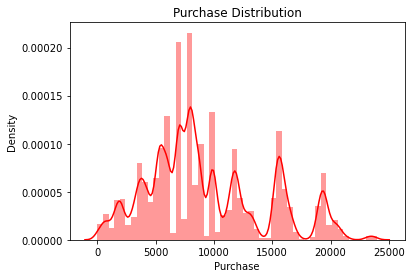

In [13]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

From the above distribution plot,We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


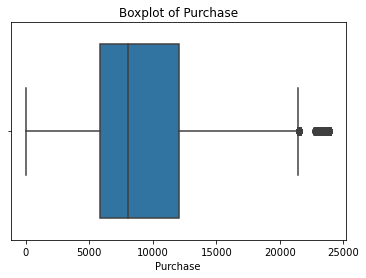

In [14]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [15]:
data["Purchase"].skew()

0.6001400037087121

In [16]:
data["Purchase"].kurtosis()

-0.33837756558517373

In [17]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

# Gender

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


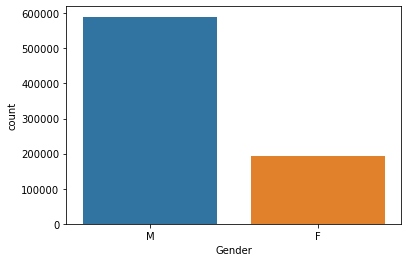

In [18]:
sns.countplot(data['Gender'])
plt.show()

In [19]:
data['Gender'].value_counts(normalize=True)*100

M    75.291036
F    24.708964
Name: Gender, dtype: float64

The count of males is more comparing to the females.

In [20]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average,male spends more money on purchase when compared to the females.

# Marital Status

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


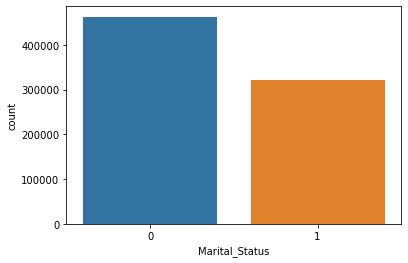

In [21]:
sns.countplot(data['Marital_Status'])
plt.show()

From the above plot,we can observe that the unmarried people purchase more compared to married people.

In [22]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

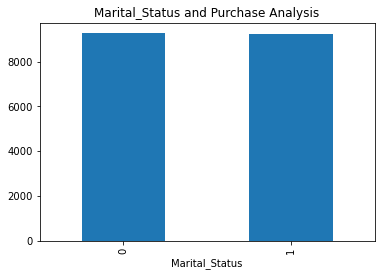

In [23]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

The average purchase of both unmarried and married people are same.

# Occupation

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


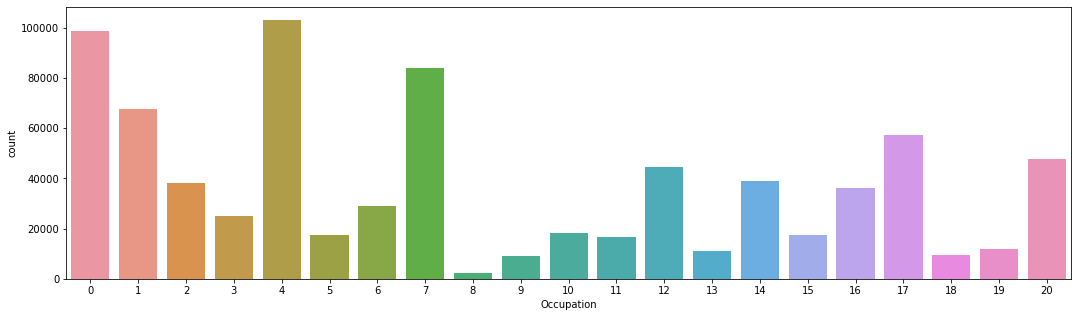

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

In [25]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


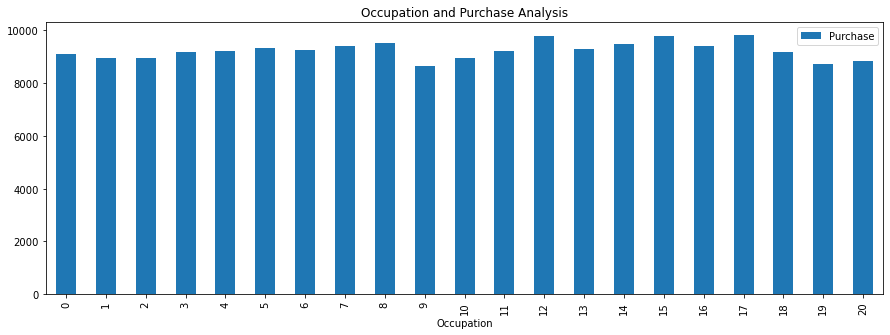

In [26]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

From the above plot,Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. 

# City_Category

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


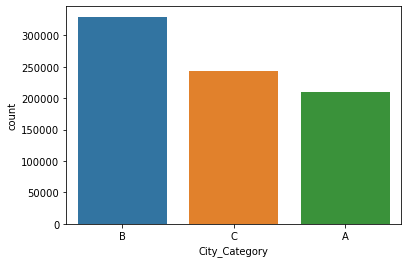

In [27]:
sns.countplot(data['City_Category'])
plt.show()

It is observed that ,city category B has more number of purchases than others.

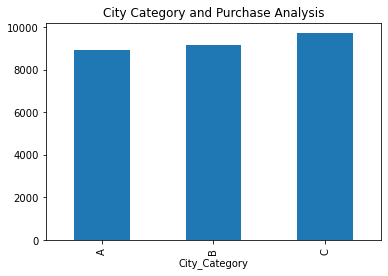

In [29]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

# Stay_In_Current_City_Years

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


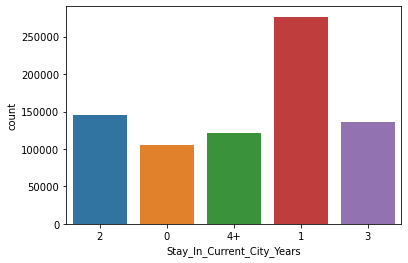

In [30]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

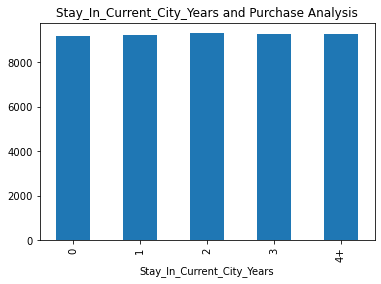

In [31]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

On average people tend to spend the same amount on purchases regardless of the group.

# Age

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


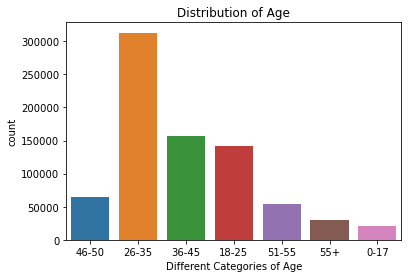

In [32]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

So,The poeple from the age group of 26-35 are tend to spend more on purchases compared to others.

<AxesSubplot:xlabel='Age'>

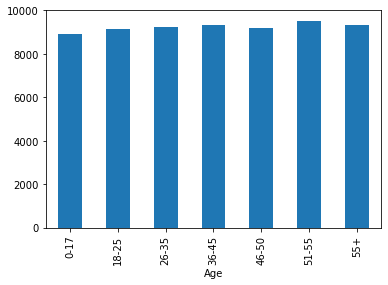

In [33]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')

Mean purchase age group rate is same for all groups except that the age group of 51-55 has a mittle more number of purchases.

# Product_Category_1

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


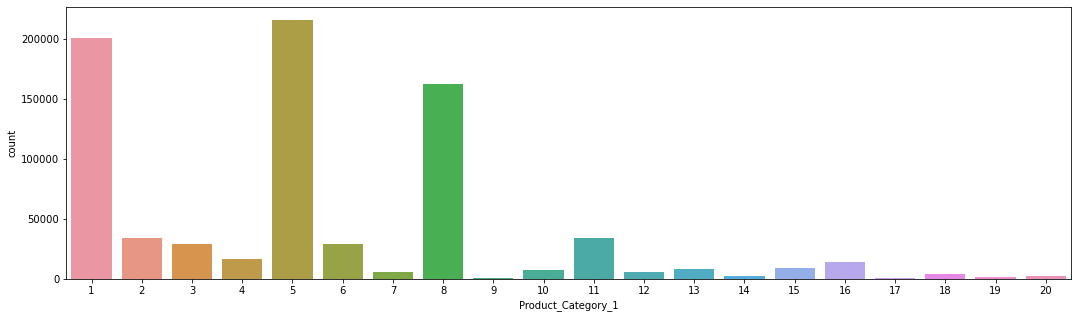

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

In Product_Category_1 ,the numbers 1,5 and 8 has the highest values.

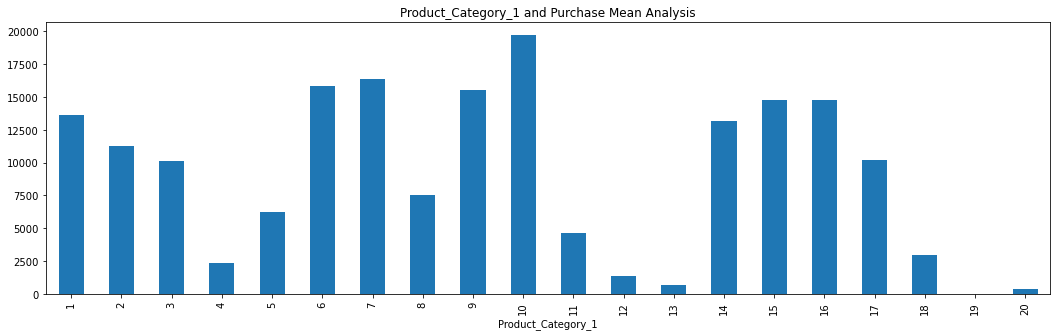

In [35]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

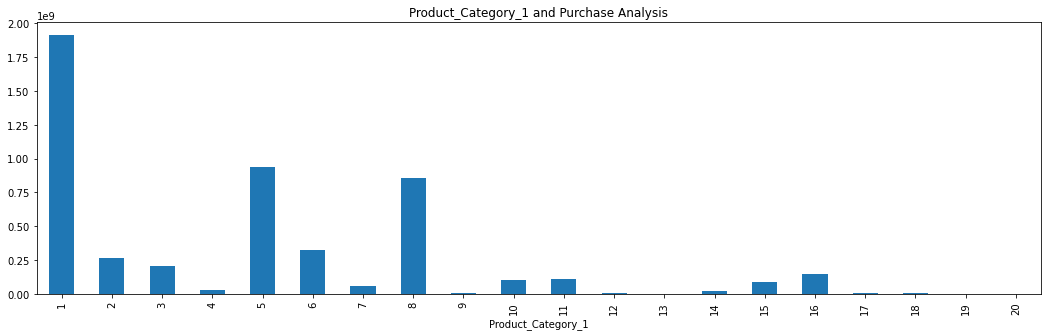

In [36]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()


# Product_Category_2

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


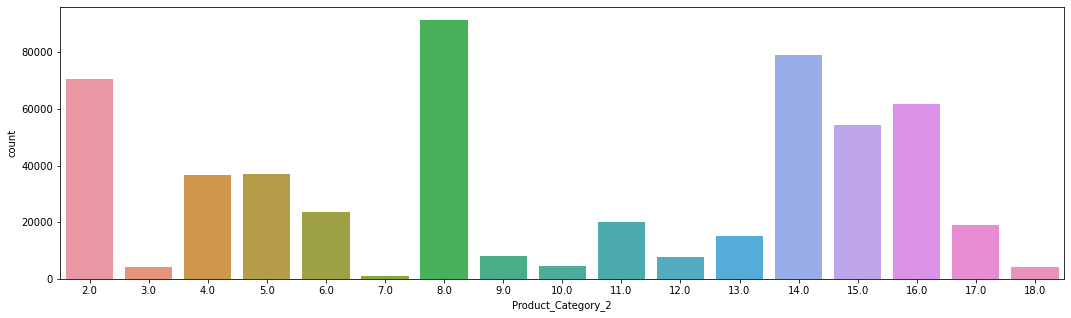

In [37]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

# Product_Category_3

C:\Users\chandu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


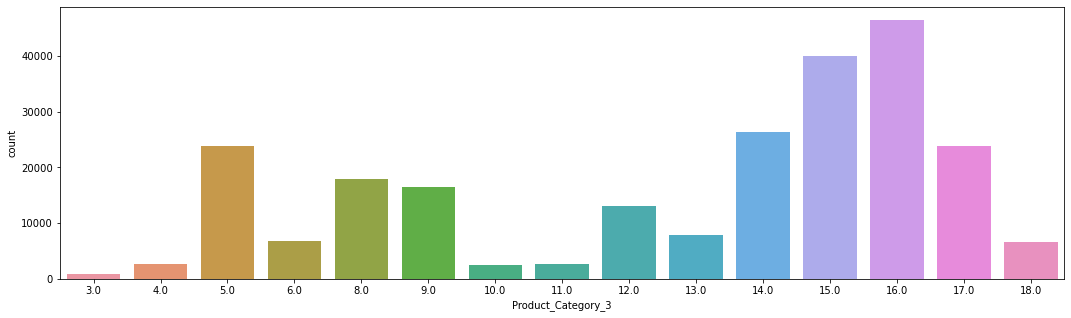

In [38]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [39]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# Heat Map

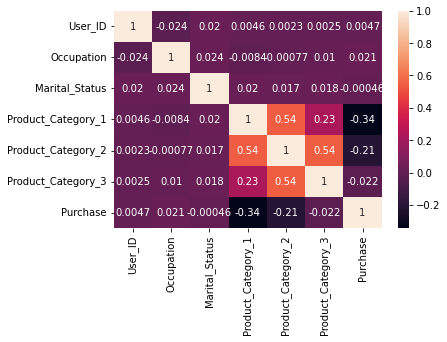

In [40]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [41]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [42]:
df = data.copy()

In [43]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


**Dummy Variables**

In [44]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

# Encode The Categorical Variables

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
df['Gender'] = le.fit_transform(df['Gender'])

In [48]:
df['Age'] = le.fit_transform(df['Age'])

In [49]:
df['City_Category'] = le.fit_transform(df['City_Category'])

In [50]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000004,P00128942,1,4,7,1,1,1,11.0,NaN,NaN,0,0,1,0,0
1,1000009,P00113442,1,2,17,2,0,3,5.0,NaN,NaN,1,0,0,0,0
2,1000010,P00288442,0,3,1,1,1,5,14.0,NaN,NaN,0,0,0,0,1
3,1000010,P00145342,0,3,1,1,1,4,9.0,NaN,NaN,0,0,0,0,1
4,1000011,P00053842,0,2,1,2,0,4,5.0,12.0,NaN,0,1,0,0,0


In [54]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')
df['Purchase'] =df['Purchase'].fillna(0).astype('int64')

In [55]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        783667 non-null  int64 
 1   Product_ID                     783667 non-null  object
 2   Gender                         783667 non-null  int32 
 3   Age                            783667 non-null  int32 
 4   Occupation                     783667 non-null  int64 
 5   City_Category                  783667 non-null  int32 
 6   Marital_Status                 783667 non-null  int64 
 7   Product_Category_1             783667 non-null  int64 
 8   Product_Category_2             783667 non-null  int64 
 9   Product_Category_3             783667 non-null  int64 
 10  Purchase                       783667 non-null  int64 
 11  Stay_In_Current_City_Years_0   783667 non-null  uint8 
 12  Stay_In_Current_City_Years_1   783667 non-nu

# Drop The Irrelevent Columns

In [57]:
df = df.drop(["User_ID","Product_ID"],axis=1)

# Split the Data into Independent and Dependent Variables

In [58]:
X = df.drop("Purchase",axis=1)

In [59]:
y=df['Purchase']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Modeling

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
lr.intercept_

6624.830356367123

In [64]:
lr.coef_

array([ 350.82822988,   73.0853404 ,    3.61346175,  217.96675302,
        -46.31582288, -235.10599959,    7.99880258,  103.01143782,
          2.04888585,   -2.91386483,   -7.12048268,   15.35226208,
         -7.36680042])

In [65]:
y_pred = lr.predict(X_test)

**RMSE**

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [67]:
mean_absolute_error(y_test, y_pred)

4761.698812275719

In [68]:
mean_squared_error(y_test, y_pred)

33932407.471758045

In [69]:
r2_score(y_test, y_pred)

0.050118584104183905

In [70]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  5825.152999858291


## Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dtr = DecisionTreeRegressor(random_state = 0)  

In [75]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [76]:
dt_y_pred = dtr.predict(X_test)

**RMSE**

In [77]:
mean_absolute_error(y_test, dt_y_pred)

4615.079017202154

In [78]:
mean_squared_error(y_test, dt_y_pred)

37585919.41447225

In [79]:
r2_score(y_test, dt_y_pred)

-0.05215541752762087

In [81]:
print("RMSE of Decison tree Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decison tree Regression Model is  6130.735634038729


## Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
RFregressor = RandomForestRegressor(random_state = 0)  

In [84]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [85]:
rf_y_pred = RFregressor.predict(X_test)

**RMSE**

In [86]:
mean_absolute_error(y_test, rf_y_pred)

4435.579272259118

In [87]:
mean_squared_error(y_test, rf_y_pred)

32012955.661047556

In [88]:
r2_score(y_test, rf_y_pred)

0.10385045105818547

In [89]:
print("RMSE of Random Forest Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Random Forest Regression Model is  5657.999263082981


## XGBoost Regressor

In [91]:
pip install xgboost

In [92]:
from xgboost.sklearn import XGBRegressor

In [93]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=40,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [94]:
xgb_y_pred = xgb_reg.predict(X_test)

**RMSE**

In [95]:
mean_absolute_error(y_test, xgb_y_pred)

4314.543028807602

In [96]:
mean_squared_error(y_test, xgb_y_pred)

27938191.65427445

In [97]:
r2_score(y_test, xgb_y_pred)

0.2179167049016948

In [98]:
print("RMSE of XGBoost Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Regression Model is  5285.659055810775


The Machine Learning algorithm that performs the best was XGBoost Regressor Model with RMSE = 5285